<a href="https://colab.research.google.com/github/r800360/PATHS-ML-Course-2023/blob/main/Higgs_Boson_Machine_Learning_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ATLAS, CMS experiment recently claimed the discovery of the Higgs boson acknowledged by the 2013 Nobel prize in physics given to Francois Englert and Peter Higgs - theorized almost 50 years ago to have the role of giving mass to other elementary particles

In the LHC, proton bunches are accelerated on a circular trajectory in both directions. When these bunches cross in the ATLAS detector, some of the protons collide, producing hundreds of millions of proton-proton collisions per second. The up to hundreds of particles resulting from each bunch crossing (called an event) are detected by sensors, producing a sparse vector of about a hundred thousand dimensions (roughly corresponding to an image or speech signal in classical machine learning applications). From this raw data, the type, the energy, and the 3D direction of each particle are estimated. In the last step of this feature construction phase, this variable length list of four-tuples is digested into a fixed-length vector of features.


These variables are first used in a real-time multi-stage cascade classifier (called the trigger) to discard most of the uninteresting events (called the background). The selected events (roughly four hundred per second) are then written on disks by a large CPU farm, producing petabytes of data per year. The saved events still, in large majority, represent known processes (called background): they are mostly produced by the decay of particles which are exotic in everyday terms, but known, having been discovered in previous generations of experiments. The goal of the offline analysis is to find a (not necessarily connected) region in the feature space in which there is a significant excess of events (called signal) compared to what known background processes can explain. Once the region has been fixed, a statistical (counting) test is applied to determine the significance of the excess. If the probability that the excess has been produced by background processes falls below a limit, the new particle is deemed to be discovered.

**Goal**: Improve the procedure that produces the selection region. We provide a training set with signal/background labels and with weights, a test set (without labels and weights), and a formal objective representing an approximation of the median significance (AMS) of the counting test. The objective is a function of the weights of selected events. We expect that significant improvements are possible by re-visiting some of the ad hoc choices in the standard procedure, or by incorporating the objective function or a surrogate into the classifier design.


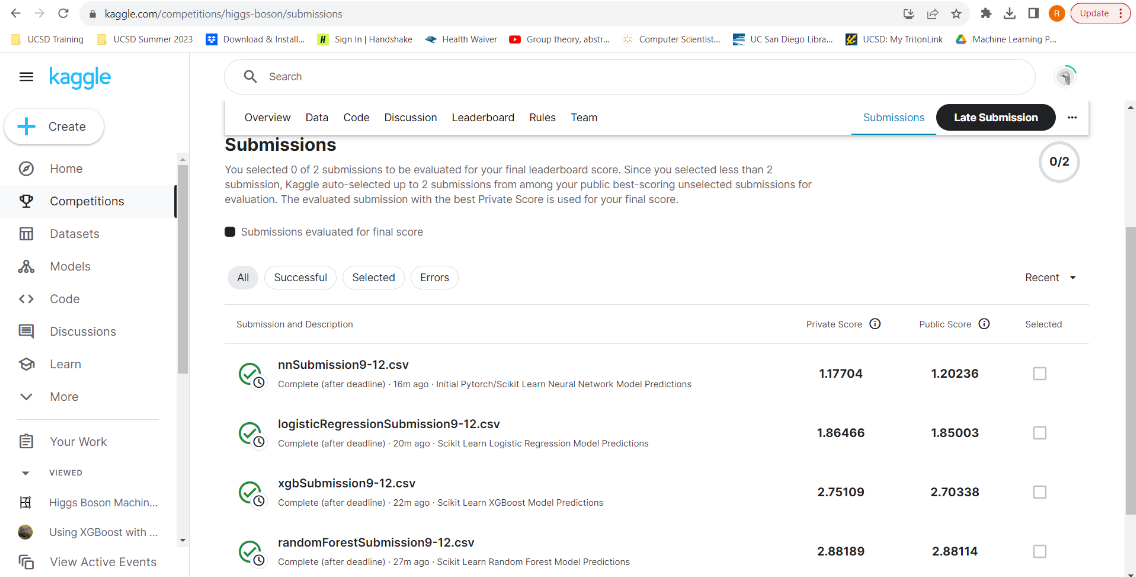

Rank: ~1130 of 1784 teams (4 Month Competition)

Link: https://www.kaggle.com/competitions/higgs-boson/overview

250,000 Observations and 30/31 features - Big Data

Classification Problem

Target: Class - Background (**boring**) or Signal (**new physics**)

Supervised Learning - We have training data and testing data.

Features:
all variables are floating point, except PRI_jet_num which is integer
variables prefixed with PRI (for PRImitives) are “raw” quantities about the bunch collision as measured by the detector.
variables prefixed with DER (for DERived) are quantities computed from the primitive features, which were selected by the physicists of ATLAS

Refer to documentation: https://higgsml.lal.in2p3.fr/files/2014/04/documentation_v1.8.pdf


We want to supply EventId, RankOrder, and Class for the 550,000 events in the testing data.

We discuss Logistic Regression, Random Forest, XGBoost, and Neural Network models. Then, we include key visualizations.

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import statistics
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import seaborn as sns

from torch.utils.data import DataLoader, TensorDataset
from google.colab import files
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.tree import *
from sklearn.ensemble import *
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder


In [ ]:
trainingData = pd.read_csv("/content/drive/MyDrive/Higgs Boson Machine Learning Challenge/training.csv")
testingData = pd.read_csv("/content/drive/MyDrive/Higgs Boson Machine Learning Challenge/test.csv")
randomSubmissionReference = pd.read_csv("/content/drive/MyDrive/Higgs Boson Machine Learning Challenge/random_submission.csv")


In [ ]:
for col in trainingData.columns:
  print(col)

EventId
DER_mass_MMC
DER_mass_transverse_met_lep
DER_mass_vis
DER_pt_h
DER_deltaeta_jet_jet
DER_mass_jet_jet
DER_prodeta_jet_jet
DER_deltar_tau_lep
DER_pt_tot
DER_sum_pt
DER_pt_ratio_lep_tau
DER_met_phi_centrality
DER_lep_eta_centrality
PRI_tau_pt
PRI_tau_eta
PRI_tau_phi
PRI_lep_pt
PRI_lep_eta
PRI_lep_phi
PRI_met
PRI_met_phi
PRI_met_sumet
PRI_jet_num
PRI_jet_leading_pt
PRI_jet_leading_eta
PRI_jet_leading_phi
PRI_jet_subleading_pt
PRI_jet_subleading_eta
PRI_jet_subleading_phi
PRI_jet_all_pt
Weight
Label


In [ ]:
trainingId = trainingData["EventId"].values
x = trainingData[["DER_mass_MMC","DER_mass_transverse_met_lep","DER_mass_vis","DER_pt_h","DER_deltaeta_jet_jet","DER_mass_jet_jet","DER_prodeta_jet_jet","DER_deltar_tau_lep","DER_pt_tot","DER_sum_pt","DER_pt_ratio_lep_tau","DER_met_phi_centrality","DER_lep_eta_centrality","PRI_tau_pt","PRI_tau_eta","PRI_tau_phi","PRI_lep_pt","PRI_lep_eta","PRI_lep_phi","PRI_met","PRI_met_phi","PRI_met_sumet","PRI_jet_num","PRI_jet_leading_pt","PRI_jet_leading_eta","PRI_jet_leading_phi","PRI_jet_subleading_pt","PRI_jet_subleading_eta","PRI_jet_subleading_phi","PRI_jet_all_pt"]].values
y = trainingData["Label"].values
xtrain, xtest, ytrain, ytest = train_test_split(x, y)

In [ ]:
logRegModel = LogisticRegression().fit(xtrain, ytrain)

print("Logistic Regression Model Information: ")
print()
print("Coefficients: ")
print(logRegModel.coef_)
print()
print("Intercept: ")
print(logRegModel.intercept_)
print()
print("Rsq: ")
print(logRegModel.score(xtrain, ytrain))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Model Information: 

Coefficients: 
[[ 1.31392899e-03 -2.41854640e-02 -6.76607346e-03 -2.47884512e-03
  -9.64327877e-05  2.44414912e-03 -3.63961882e-04  1.21087727e-03
  -1.28540276e-03  7.95524584e-03 -1.29208485e-03  2.16542301e-03
   2.85186878e-04  2.03477870e-02 -1.00847657e-04 -1.41067674e-04
   1.72032693e-03 -1.34990558e-04  1.63408865e-04  1.14224681e-02
   9.44875560e-05 -1.98269424e-03 -6.05849946e-04  5.90968766e-04
  -7.36334810e-05 -6.57497034e-05 -2.18151598e-03  5.18716946e-05
  -2.09342224e-05 -1.41128517e-02]]

Intercept: 
[-0.00015437]

Rsq: 
0.738128


In [ ]:
#Model Predictions on Testing Data
#print("Testing Results: ")
logRegPredList = []
actualList = []
xtestLength = len(xtest)
for index in range(xtestLength):
    x = xtest[index]
    x = x.reshape(-1,30)
    y_prediction = logRegModel.predict(x)
    actual = ytest[index]
    #if (index > 0.01*xtestLength):
    #  print("Predicted Class: ", y_prediction, "and Actual Class: ", actual)
    logRegPredList.append(y_prediction)
    actualList.append(actual)

In [ ]:
logRegMetrics = []
#Evaluation Metrics:
# Accuracy: proportion of correctly predicted instances
print("Accuracy: ")
accuracy = accuracy_score(actualList, logRegPredList)
print(accuracy)
logRegMetrics.append(accuracy)

#true positive background/background
#true negative signal/signal
#false positive background/signal -
#false negative signal/background
#Type II Errors Are Worse

#Applying confusion matrix to calculate precision, recall, specificity, and
#false positive rate
conf_matrix_logReg = confusion_matrix(actualList, logRegPredList)
tn, fp, fn, tp = conf_matrix_logReg.ravel()
precision = tp/(tp + fp)
recall = tp/(tp + fn)
specificity = tn / (tn + fp)
fpr = fp / (tn + fp)

# Precision: ratio of true positive predictions to all positive predictions
#made by the model.
print("Precision: ")
print(precision)
logRegMetrics.append(precision)

# Recall: ratio of true positive predictions to all actual positive instances
print("Recall: ")
print(recall)
logRegMetrics.append(recall)

# Specificity: ability of the model to correctly identify negative instances
print("Specificity: ")
print(specificity)
logRegMetrics.append(specificity)

#False Positive Rate: proportion of false positive predictions relative to all
#actual negative instances
print("False Positive Rate: ")
print(fpr)
logRegMetrics.append(fpr)

# F1-Score: harmonic mean of precision and recall
print("F1 Score: ")
f1 = statistics.harmonic_mean([precision, recall])
print(f1)
logRegMetrics.append(f1)

# Cohen's Kappa: agreement between predicted and actual labels while accounting
#for the possibility of agreement occurring by chance
print("Cohen's Kappa: ")
kappa = cohen_kappa_score(actualList, logRegPredList)
print(kappa)
logRegMetrics.append(kappa)


Accuracy: 
0.737888
Precision: 
0.658381174689294
Recall: 
0.48759519693500913
Specificity: 
0.8682385575589459
False Positive Rate: 
0.1317614424410541
F1 Score: 
0.5602619852901702
Cohen's Kappa: 
0.37941594837304127


In [ ]:
#550,000 test.csv Predictions
testingDataMatch = testingData[["DER_mass_MMC","DER_mass_transverse_met_lep","DER_mass_vis","DER_pt_h","DER_deltaeta_jet_jet","DER_mass_jet_jet","DER_prodeta_jet_jet","DER_deltar_tau_lep","DER_pt_tot","DER_sum_pt","DER_pt_ratio_lep_tau","DER_met_phi_centrality","DER_lep_eta_centrality","PRI_tau_pt","PRI_tau_eta","PRI_tau_phi","PRI_lep_pt","PRI_lep_eta","PRI_lep_phi","PRI_met","PRI_met_phi","PRI_met_sumet","PRI_jet_num","PRI_jet_leading_pt","PRI_jet_leading_eta","PRI_jet_leading_phi","PRI_jet_subleading_pt","PRI_jet_subleading_eta","PRI_jet_subleading_phi","PRI_jet_all_pt"]]
#testingID = testingData["EventId"]
logRegPredictionProbabilities = logRegModel.predict_proba(testingDataMatch)
logRegPredictions = logRegModel.predict(testingDataMatch)

# Rank the instances based on class probabilities
# Create an array of probabilities for the positive class (class 1)
positive_class_probabilities = logRegPredictionProbabilities[:, 1]

# Use argsort to get the indices that would sort the array
sorted_indices = np.argsort(positive_class_probabilities)

# Create an array of rankings using the sorted indices
ranked_array = np.empty_like(sorted_indices)
ranked_array[sorted_indices] = np.arange(len(positive_class_probabilities)) + 1

df = pd.DataFrame({'EventId': testingData["EventId"], 'RankOrder': ranked_array, 'Class': logRegPredictions})
print(df)
df.to_csv('logisticRegressionSubmission.csv')

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


        EventId  RankOrder Class
0        350000      55909     b
1        350001     179856     b
2        350002     306105     b
3        350003     412729     s
4        350004       2209     b
...         ...        ...   ...
549995   899995     466920     s
549996   899996     392044     b
549997   899997      97281     b
549998   899998     428163     s
549999   899999     139259     b

[550000 rows x 3 columns]


In [ ]:
#START of Random Forest Bagging

# Create the Random Forest Classifier
randomForestModel = RandomForestClassifier(n_estimators=100)

# Train the model on the training data
randomForestModel.fit(xtrain, ytrain)

RandomForestClassifier()

In [ ]:
#Model Predictions on Testing Data
#print("Testing Results: ")
randomForestPredList = []
actualList = []
xtestLength = len(xtest)
for index in range(xtestLength):
    x = xtest[index]
    x = x.reshape(-1,30)
    y_prediction = randomForestModel.predict(x)
    actual = ytest[index]
    #if (index > 0.01*xtestLength):
    #  print("Predicted Class: ", y_prediction, "and Actual Class: ", actual)
    randomForestPredList.append(y_prediction)
    actualList.append(actual)

In [ ]:
randomForestMetrics = []

#Evaluation Metrics:
# Accuracy: proportion of correctly predicted instances
print("Accuracy: ")
accuracy = accuracy_score(actualList, randomForestPredList)
print(accuracy)
randomForestMetrics.append(accuracy)

#Applying confusion matrix to calculate precision, recall, specificity, and
#false positive rate
conf_matrix_randomForest = confusion_matrix(actualList, randomForestPredList)
tn, fp, fn, tp = conf_matrix_randomForest.ravel()
precision = tp/(tp + fp)
recall = tp/(tp + fn)
specificity = tn / (tn + fp)
fpr = fp / (tn + fp)

# Precision: ratio of true positive predictions to all positive predictions
#made by the model.
print("Precision: ")
print(precision)
randomForestMetrics.append(precision)

# Recall: ratio of true positive predictions to all actual positive instances
print("Recall: ")
print(recall)
randomForestMetrics.append(recall)

# Specificity: ability of the model to correctly identify negative instances
print("Specificity: ")
print(specificity)
randomForestMetrics.append(specificity)

#False Positive Rate: proportion of false positive predictions relative to all
#actual negative instances
print("False Positive Rate: ")
print(fpr)
randomForestMetrics.append(fpr)

# F1-Score: harmonic mean of precision and recall
print("F1 Score: ")
f1 = statistics.harmonic_mean([precision, recall])
print(f1)
randomForestMetrics.append(f1)

# Cohen's Kappa: agreement between predicted and actual labels while accounting
#for the possibility of agreement occurring by chance
print("Cohen's Kappa: ")
kappa = cohen_kappa_score(actualList, randomForestPredList)
print(kappa)
randomForestMetrics.append(kappa)

Accuracy: 
0.83808
Precision: 
0.7941805287584085
Recall: 
0.7115824884362005
Specificity: 
0.9039589264423193
False Positive Rate: 
0.09604107355768061
F1 Score: 
0.7506160670280926
Cohen's Kappa: 
0.6312725934512038


In [ ]:
#550,000 test.csv Predictions
randomForestPredictionProbabilities = randomForestModel.predict_proba(testingDataMatch)
randomForestPredictions = randomForestModel.predict(testingDataMatch)

# Rank the instances based on class probabilities
# Create an array of probabilities for the positive class (class 1)
positive_class_probabilities = randomForestPredictionProbabilities[:, 1]

# Use argsort to get the indices that would sort the array
sorted_indices = np.argsort(positive_class_probabilities)

# Create an array of rankings using the sorted indices
ranked_array = np.empty_like(sorted_indices)
ranked_array[sorted_indices] = np.arange(len(positive_class_probabilities)) + 1

df = pd.DataFrame({'EventId': testingData["EventId"], 'RankOrder': ranked_array, 'Class': randomForestPredictions})
print(df)
df.to_csv('randomForestSubmission.csv')

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


        EventId  RankOrder Class
0        350000          1     b
1        350001     246796     b
2        350002     395882     s
3        350003     513053     s
4        350004     110184     b
...         ...        ...   ...
549995   899995     203001     b
549996   899996     358801     b
549997   899997      59607     b
549998   899998     309903     b
549999   899999     295672     b

[550000 rows x 3 columns]


In [ ]:
#START OF XGBOOST

# Initialize the label encoder
label_encoder = LabelEncoder()

# Fit and transform the target variable
y_train_encoded = label_encoder.fit_transform(ytrain)
y_test_encoded = label_encoder.transform(ytest)

# Train the XGBoost model
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
xgb_model.fit(xtrain, y_train_encoded)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
#Model Predictions on Testing Data
#print("Testing Results: ")
xgbPredList = []
actualList = []
xtestLength = len(xtest)
for index in range(xtestLength):
    x = xtest[index]
    x = x.reshape(-1,30)
    y_prediction_encoded = xgb_model.predict(x)
    actual = ytest[index]
    #if (index > 0.01*xtestLength):
    #  print("Predicted Class: ", y_prediction, "and Actual Class: ", actual)
    xgbPredList.append(y_prediction_encoded)
    actualList.append(actual)

In [ ]:
print(randomForestPredList)
print(label_encoder.inverse_transform(xgbPredList))
print(type(randomForestPredList))
print(type(label_encoder.inverse_transform(xgbPredList)))

[array(['b'], dtype=object), array(['b'], dtype=object), array(['b'], dtype=object), array(['b'], dtype=object), array(['s'], dtype=object), array(['b'], dtype=object), array(['s'], dtype=object), array(['b'], dtype=object), array(['s'], dtype=object), array(['s'], dtype=object), array(['b'], dtype=object), array(['b'], dtype=object), array(['b'], dtype=object), array(['s'], dtype=object), array(['b'], dtype=object), array(['b'], dtype=object), array(['b'], dtype=object), array(['s'], dtype=object), array(['b'], dtype=object), array(['s'], dtype=object), array(['b'], dtype=object), array(['b'], dtype=object), array(['s'], dtype=object), array(['b'], dtype=object), array(['b'], dtype=object), array(['s'], dtype=object), array(['b'], dtype=object), array(['b'], dtype=object), array(['b'], dtype=object), array(['b'], dtype=object), array(['s'], dtype=object), array(['b'], dtype=object), array(['b'], dtype=object), array(['b'], dtype=object), array(['b'], dtype=object), array(['b'], dtype=

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
xgbRegMetrics = []
#Evaluation Metrics:
# Accuracy: proportion of correctly predicted instances
print("Accuracy: ")
accuracy = accuracy_score(actualList, label_encoder.inverse_transform(xgbPredList))
print(accuracy)
xgbRegMetrics.append(accuracy)

#Applying confusion matrix to calculate precision, recall, specificity, and
#false positive rate
conf_matrix_xgb = confusion_matrix(actualList, label_encoder.inverse_transform(xgbPredList))
tn, fp, fn, tp = conf_matrix_xgb.ravel()
precision = tp/(tp + fp)
recall = tp/(tp + fn)
specificity = tn / (tn + fp)
fpr = fp / (tn + fp)

# Precision: ratio of true positive predictions to all positive predictions
#made by the model.
print("Precision: ")
print(precision)
xgbRegMetrics.append(precision)

# Recall: ratio of true positive predictions to all actual positive instances
print("Recall: ")
print(recall)
xgbRegMetrics.append(recall)

# Specificity: ability of the model to correctly identify negative instances
print("Specificity: ")
print(specificity)
xgbRegMetrics.append(specificity)

#False Positive Rate: proportion of false positive predictions relative to all
#actual negative instances
print("False Positive Rate: ")
print(fpr)
xgbRegMetrics.append(fpr)

# F1-Score: harmonic mean of precision and recall
print("F1 Score: ")
f1 = statistics.harmonic_mean([precision, recall])
print(f1)
xgbRegMetrics.append(f1)

# Cohen's Kappa: agreement between predicted and actual labels while accounting
#for the possibility of agreement occurring by chance
print("Cohen's Kappa: ")
kappa = cohen_kappa_score(actualList, label_encoder.inverse_transform(xgbPredList))
print(kappa)
xgbRegMetrics.append(kappa)

Accuracy: 
0.830816


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Precision: 
0.7786813526172217
Recall: 
0.706863523805074
Specificity: 
0.895369491690391
False Positive Rate: 
0.10463050830960897
F1 Score: 
0.7410364420062695
Cohen's Kappa: 


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.615842317205521


In [ ]:
#550,000 test.csv Predictions
xgbPredictionProbabilities = xgb_model.predict_proba(testingDataMatch)
xgbPredictions_Encoded = xgb_model.predict(testingDataMatch)

# Rank the instances based on class probabilities
# Create an array of probabilities for the positive class (class 1)
positive_class_probabilities = xgbPredictionProbabilities[:, 1]

# Use argsort to get the indices that would sort the array
sorted_indices = np.argsort(positive_class_probabilities)

# Create an array of rankings using the sorted indices
ranked_array = np.empty_like(sorted_indices)
ranked_array[sorted_indices] = np.arange(len(positive_class_probabilities)) + 1

df = pd.DataFrame({'EventId': testingData["EventId"], 'RankOrder': ranked_array, 'Class': label_encoder.inverse_transform(xgbPredictions_Encoded)})
print(df)
df.to_csv('xgbSubmission.csv')

        EventId  RankOrder Class
0        350000      24129     b
1        350001     232957     b
2        350002     386344     s
3        350003     509049     s
4        350004      41431     b
...         ...        ...   ...
549995   899995     170256     b
549996   899996     386230     s
549997   899997     172232     b
549998   899998     383342     s
549999   899999     272087     b

[550000 rows x 3 columns]


In [ ]:
#START of Pytorch Neural Network

# Convert NumPy arrays to PyTorch tensors
xtrainTensor = torch.Tensor(xtrain)
xtestTensor = torch.Tensor(xtest)

# Convert to boolean values (e.g., 'b' -> False, 's' -> True)
ytrainBool = (ytrain == 's').astype(bool)

# Convert to PyTorch tensor
ytrainBoolTensor = torch.BoolTensor(ytrainBool)

# Convert to boolean values (e.g., 'b' -> False, 's' -> True)
ytestBool = (ytest == 's').astype(bool)

# Convert to PyTorch tensor
ytestBoolTensor = torch.BoolTensor(ytestBool)

# Create TensorDataset objects
trainDataset = TensorDataset(xtrainTensor, ytrainBoolTensor)
testDataset = TensorDataset(xtestTensor, ytestBoolTensor)

# Create DataLoader objects for training and testing
train_loader = DataLoader(trainDataset, batch_size=64, shuffle=True)
test_loader = DataLoader(testDataset, batch_size=64, shuffle=False)

In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, 1)  # Single output unit
        self.sigmoid = nn.Sigmoid()  # Sigmoid activation

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.sigmoid(x)  # Apply sigmoid activation
        return x

In [ ]:
# Create an instance of the model
input_size = 30
hidden_size = 1000
nnModel = NeuralNetwork(input_size, hidden_size)

In [ ]:
ytrainBoolTensor = ytrainBoolTensor.long()
#ytrainLongTensor = ytrainBoolTensor.long()

In [ ]:
criterion = nn.BCELoss()
optimizer = optim.Adam(nnModel.parameters(), lr=0.001)

In [ ]:
num_epochs = 10

for epoch in range(num_epochs):
    for inputs, labels in train_loader:
        optimizer.zero_grad()  # Clear gradients
        outputs = nnModel(inputs).squeeze(dim=1)  # Squeeze to remove the extra dimension
        loss = criterion(outputs, labels.float())  # Use float labels
        loss.backward()  # Compute gradients
        optimizer.step()  # Update weights

# Optionally, save the trained model
torch.save(nnModel.state_dict(), 'model.pth')

In [ ]:
nnModel.eval()  # Set the model to evaluation mode

predicted_labels = []
true_labels = []
nnMetrics = []

with torch.no_grad():
    for inputs, labels in test_loader:
        test_outputs = nnModel(inputs).squeeze(dim=1)
        predicted_labels.extend((test_outputs > 0.5).int().cpu().numpy())
        true_labels.extend(labels.cpu().numpy())


#Evaluation Metrics:
# Accuracy: proportion of correctly predicted instances
print("Accuracy: ")
accuracy = accuracy_score(true_labels, predicted_labels)
print(accuracy)
nnMetrics.append(accuracy)

#Applying confusion matrix to calculate precision, recall, specificity, and
#false positive rate
conf_matrix_nn = confusion_matrix(true_labels, predicted_labels)
print(conf_matrix_nn)
tn, fp, fn, tp = conf_matrix_nn.ravel()
precision = tp/(tp + fp)
recall = tp/(tp + fn)
specificity = tn / (tn + fp)
fpr = fp / (tn + fp)

# Calculate classification report, including precision, recall, and F1-score
class_report = classification_report(true_labels, predicted_labels)

print("Classification Report:")
print(class_report)

# Precision: ratio of true positive predictions to all positive predictions
#made by the model.
print("Precision: ")
print(precision)
nnMetrics.append(precision)

# Recall: ratio of true positive predictions to all actual positive instances
print("Recall: ")
print(recall)
nnMetrics.append(recall)

# Specificity: ability of the model to correctly identify negative instances
print("Specificity: ")
print(specificity)
nnMetrics.append(specificity)

#False Positive Rate: proportion of false positive predictions relative to all
#actual negative instances
print("False Positive Rate: ")
print(fpr)
nnMetrics.append(fpr)

# F1-Score: harmonic mean of precision and recall
print("F1 Score: ")
f1 = statistics.harmonic_mean([precision, recall])
print(f1)
nnMetrics.append(f1)

# Cohen's Kappa: agreement between predicted and actual labels while accounting
#for the possibility of agreement occurring by chance
print("Cohen's Kappa: ")
kappa = cohen_kappa_score(true_labels, predicted_labels)
print(kappa)
nnMetrics.append(kappa)

Accuracy: 
0.732624
[[39677  1420]
 [15291  6112]]
Classification Report:
              precision    recall  f1-score   support

       False       0.72      0.97      0.83     41097
        True       0.81      0.29      0.42     21403

    accuracy                           0.73     62500
   macro avg       0.77      0.63      0.62     62500
weighted avg       0.75      0.73      0.69     62500

Precision: 
0.8114710568242167
Recall: 
0.28556744381628746
Specificity: 
0.965447599581478
False Positive Rate: 
0.034552400418522033
F1 Score: 
0.42246414377052016
Cohen's Kappa: 
0.2971591252426541


In [ ]:
nnPredictionProbabilities = []
nnPredictionsBool = []

#550,000 test.csv Predictions
with torch.no_grad():
    for inputs in DataLoader(TensorDataset(torch.Tensor(testingDataMatch.values)), batch_size=64, shuffle=False):
      someOutputs = nnModel(inputs[0]).squeeze(dim=1)
      nnPredictionProbabilities.extend(someOutputs.cpu().numpy())
      nnPredictionsBool.extend((someOutputs > 0.5).int().cpu().numpy())

# Rank the instances based on class probabilities
# Create an array of probabilities for the positive class (class 1)
positive_class_probabilities = nnPredictionProbabilities

# Use argsort to get the indices that would sort the array
sorted_indices = np.argsort(positive_class_probabilities)

# Create an array of rankings using the sorted indices
ranked_array = np.empty_like(sorted_indices)
ranked_array[sorted_indices] = np.arange(len(positive_class_probabilities)) + 1
nnPredictions = ['s' if item else 'b' for item in nnPredictionsBool]

df = pd.DataFrame({'EventId': testingData["EventId"], 'RankOrder': ranked_array, 'Class': nnPredictions})
print(df)
df.to_csv('nnSubmission.csv')

        EventId  RankOrder Class
0        350000          1     b
1        350001     374741     b
2        350002     374742     b
3        350003     374746     b
4        350004     397484     b
...         ...        ...   ...
549995   899995     152065     b
549996   899996     152064     b
549997   899997     152063     b
549998   899998     100211     b
549999   899999     228109     b

[550000 rows x 3 columns]


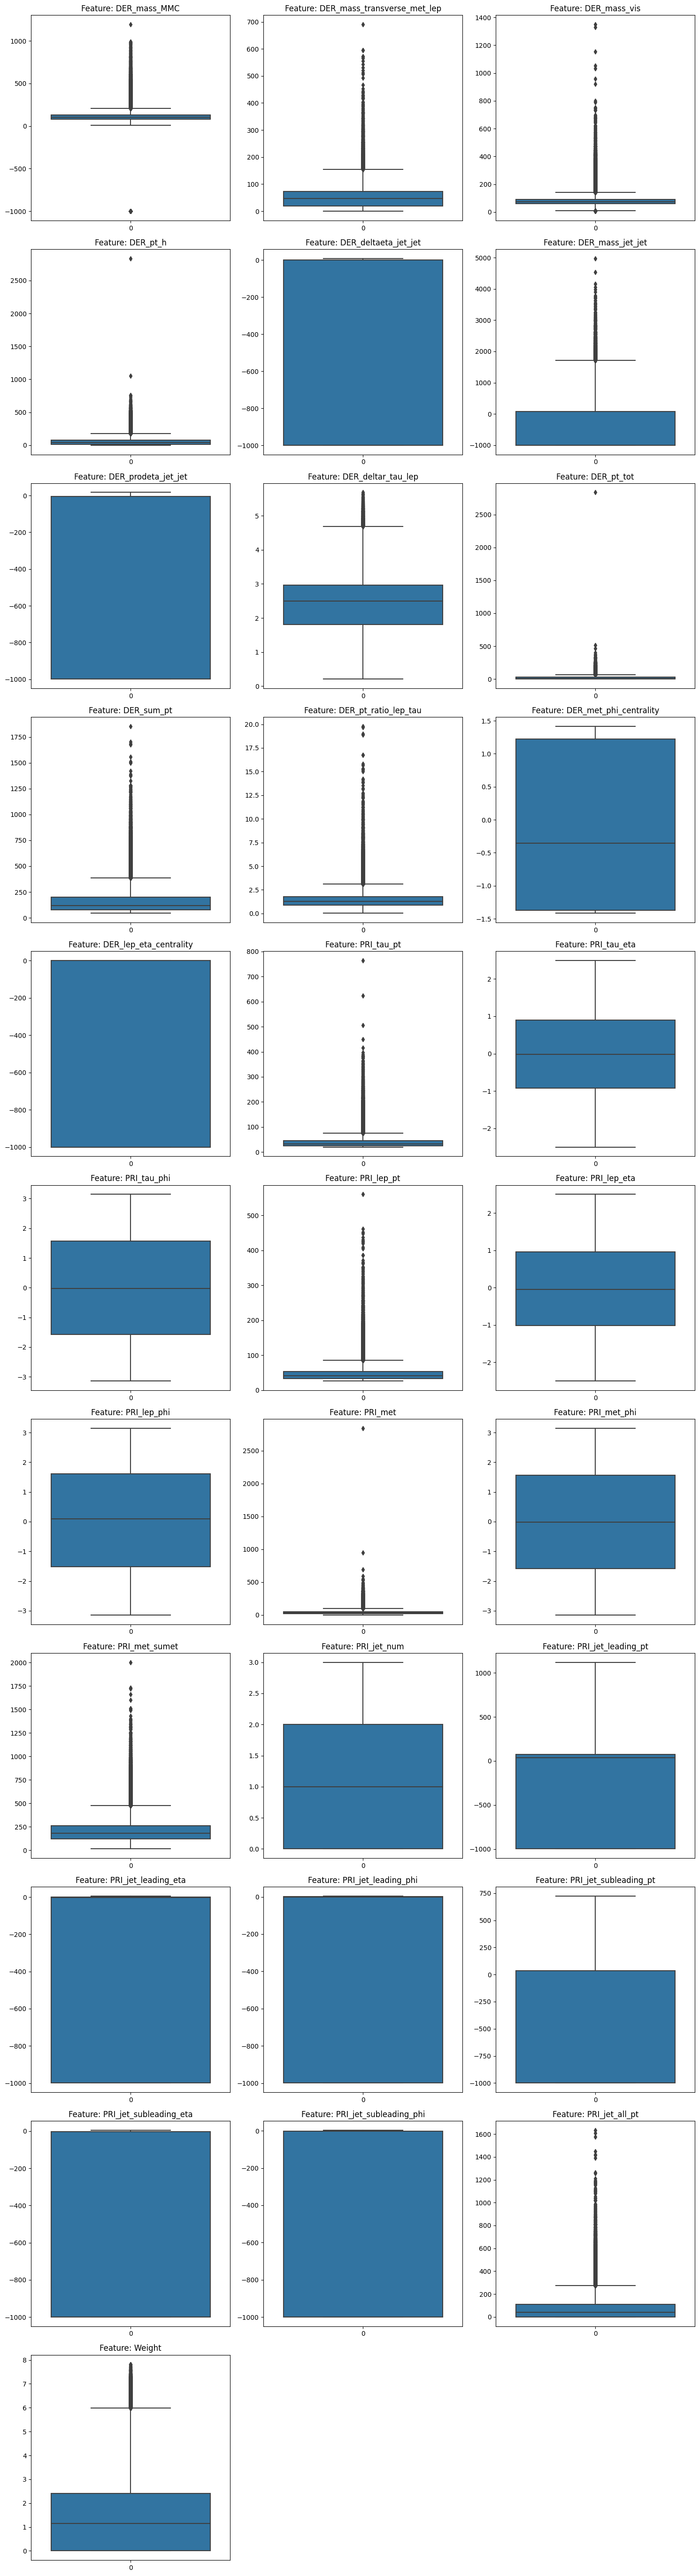

In [ ]:
z = trainingData[["DER_mass_MMC","DER_mass_transverse_met_lep","DER_mass_vis","DER_pt_h","DER_deltaeta_jet_jet","DER_mass_jet_jet","DER_prodeta_jet_jet","DER_deltar_tau_lep","DER_pt_tot","DER_sum_pt","DER_pt_ratio_lep_tau","DER_met_phi_centrality","DER_lep_eta_centrality","PRI_tau_pt","PRI_tau_eta","PRI_tau_phi","PRI_lep_pt","PRI_lep_eta","PRI_lep_phi","PRI_met","PRI_met_phi","PRI_met_sumet","PRI_jet_num","PRI_jet_leading_pt","PRI_jet_leading_eta","PRI_jet_leading_phi","PRI_jet_subleading_pt","PRI_jet_subleading_eta","PRI_jet_subleading_phi","PRI_jet_all_pt", "Weight"]]
# Set up subplots
num_features = 31  # The number of features you have
num_rows = (num_features + 2) // 3  # Calculate the number of rows needed based on the number of features
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5 * num_rows))

# Create box plots or violin plots for each feature
for i, feature in enumerate(z.columns):
    row = i // 3
    col = i % 3
    ax = axes[row, col]

    # Choose between box plot and violin plot based on your preference
    sns.boxplot(data=z[feature], ax=ax)  # Replace with sns.violinplot() for violin plots
    ax.set_title(f'Feature: {feature}')

# Remove any empty subplots if the number of features is not a multiple of 3
for i in range(num_features, num_rows * 3):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

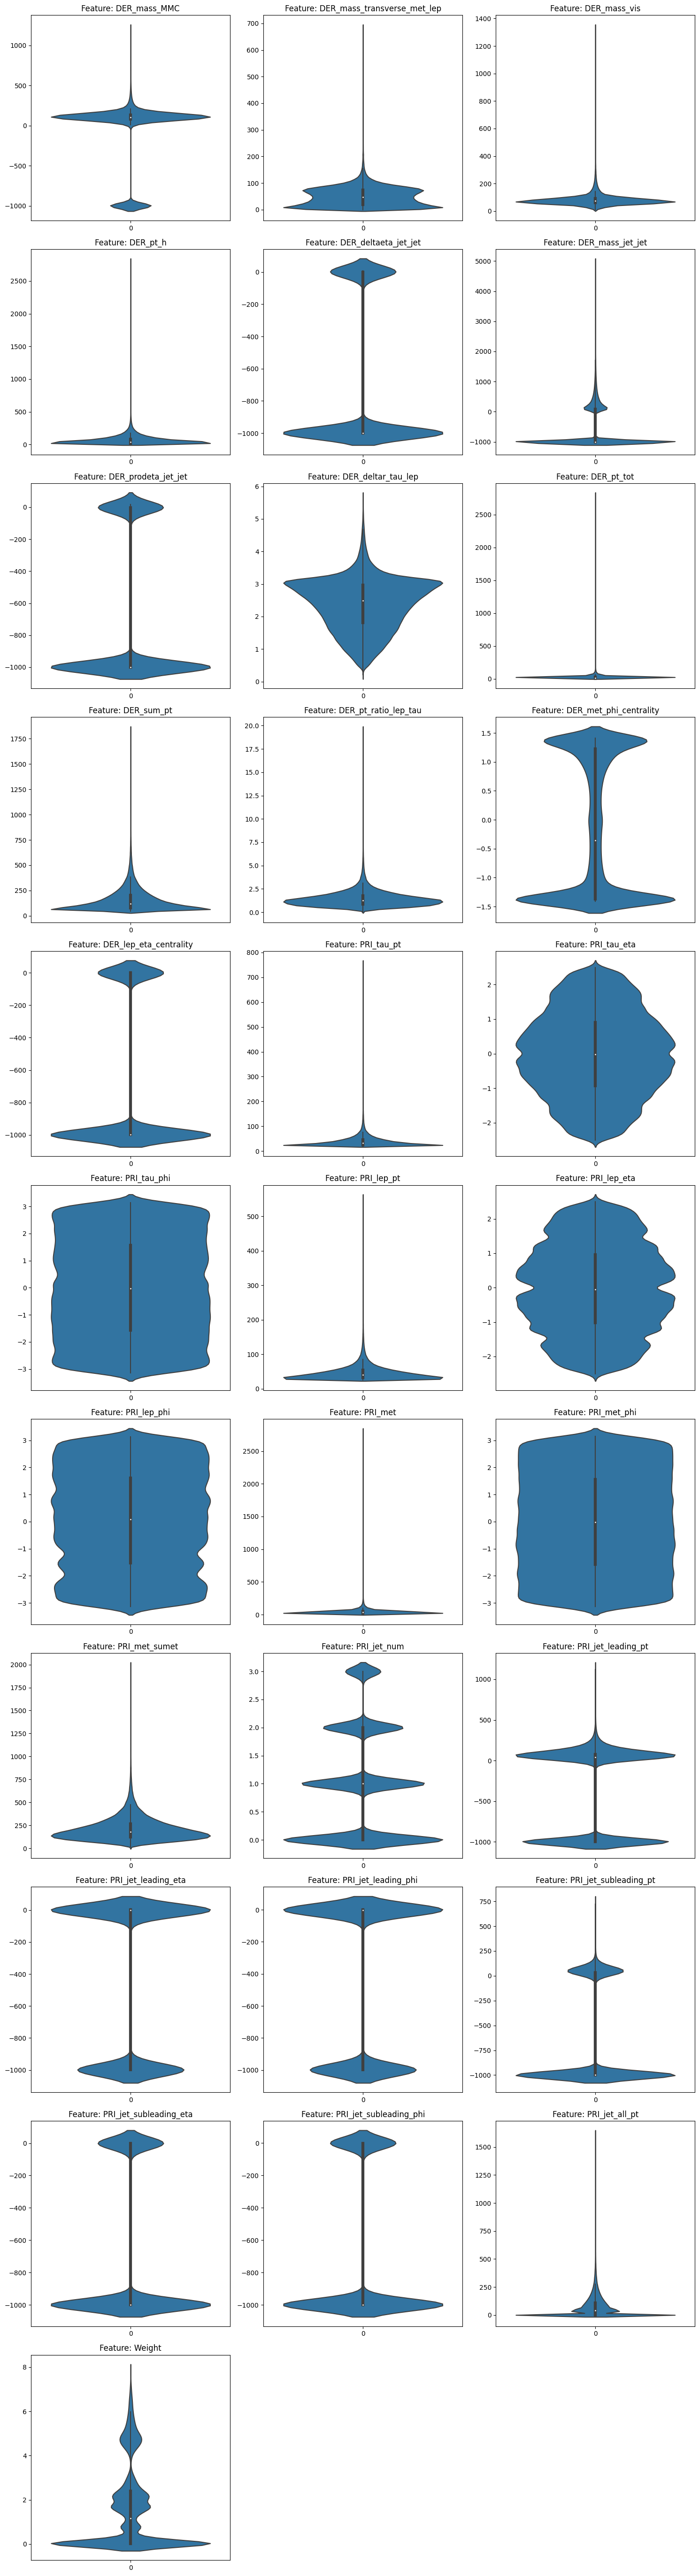

In [ ]:
# Set up subplots
num_features = 31  # The number of features you have
num_rows = (num_features + 2) // 3  # Calculate the number of rows needed based on the number of features
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5 * num_rows))

# Create box plots or violin plots for each feature
for i, feature in enumerate(z.columns):
    row = i // 3
    col = i % 3
    ax = axes[row, col]

    # Choose between box plot and violin plot based on your preference
    sns.violinplot(data=z[feature], ax=ax)  # Replace with sns.violinplot() for violin plots
    ax.set_title(f'Feature: {feature}')

# Remove any empty subplots if the number of features is not a multiple of 3
for i in range(num_features, num_rows * 3):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

In [ ]:
#Evaluation Metrics Table
# Define your four arrays as rows

# Create a DataFrame
df = pd.DataFrame([logRegMetrics, randomForestMetrics, xgbRegMetrics, nnMetrics], columns=["Accuracy","Precision","Recall","Specificity","False Positive Rate","F1 Score","Cohen's Kappa"])
df.insert(0, "Name", ["Logistic Regression", "Random Forest", "XGBoost", "Neural Network"])
# Display the DataFrame
print(df)

                  Name  Accuracy  Precision    Recall  Specificity  \
0  Logistic Regression  0.737888   0.658381  0.487595     0.868239   
1        Random Forest  0.838080   0.794181  0.711582     0.903959   
2              XGBoost  0.830816   0.778681  0.706864     0.895369   
3       Neural Network  0.732624   0.811471  0.285567     0.965448   

   False Positive Rate  F1 Score  Cohen's Kappa  
0             0.131761  0.560262       0.379416  
1             0.096041  0.750616       0.631273  
2             0.104631  0.741036       0.615842  
3             0.034552  0.422464       0.297159  


In [ ]:
from IPython.display import display

# Create a sample DataFra

# Display the DataFrame as an HTML table
display(df)

,Name,Accuracy,Precision,Recall,Specificity,False Positive Rate,F1 Score,Cohen's Kappa
0,Logistic Regression,0.737888,0.658381,0.487595,0.868239,0.131761,0.560262,0.379416
1,Random Forest,0.838080,0.794181,0.711582,0.903959,0.096041,0.750616,0.631273
2,XGBoost,0.830816,0.778681,0.706864,0.895369,0.104631,0.741036,0.615842
3,Neural Network,0.732624,0.811471,0.285567,0.965448,0.034552,0.422464,0.297159


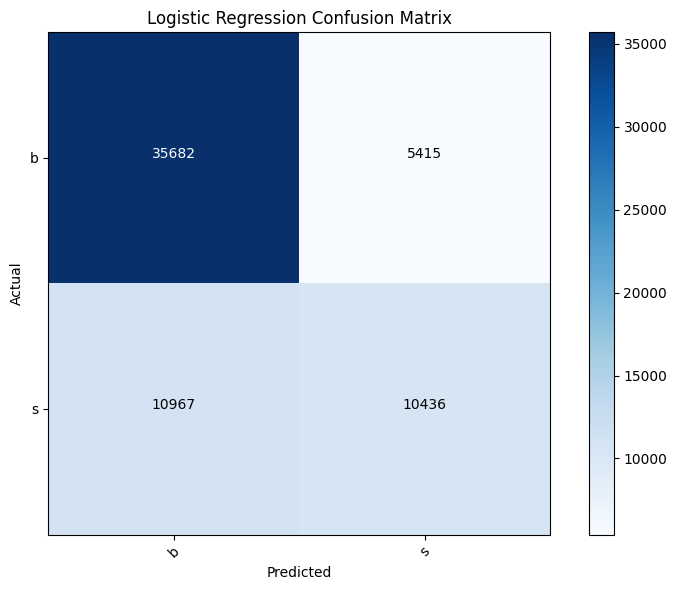

In [ ]:
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix_logReg, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Logistic Regression Confusion Matrix')
plt.colorbar()

# Add labels to the axes (manually set class names)
classes = np.unique(y)  # Get unique class labels from your target column
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Add the actual numbers in each cell
for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, format(conf_matrix_logReg[i, j], 'd'), horizontalalignment="center", color="white" if conf_matrix_logReg[i, j] > conf_matrix_logReg.max() / 2 else "black")

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

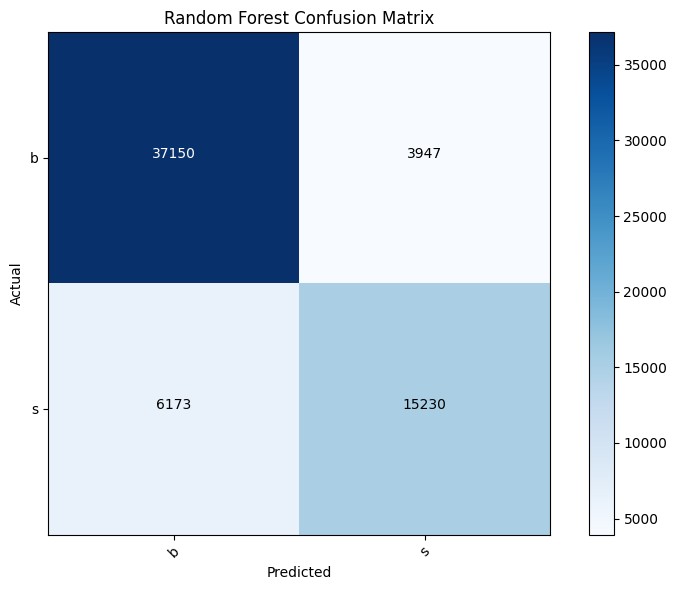

In [ ]:
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix_randomForest, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Random Forest Confusion Matrix')
plt.colorbar()

# Add labels to the axes (manually set class names)
classes = np.unique(y)  # Get unique class labels from your target column
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Add the actual numbers in each cell
for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, format(conf_matrix_randomForest[i, j], 'd'), horizontalalignment="center", color="white" if conf_matrix_randomForest[i, j] > conf_matrix_randomForest.max() / 2 else "black")

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

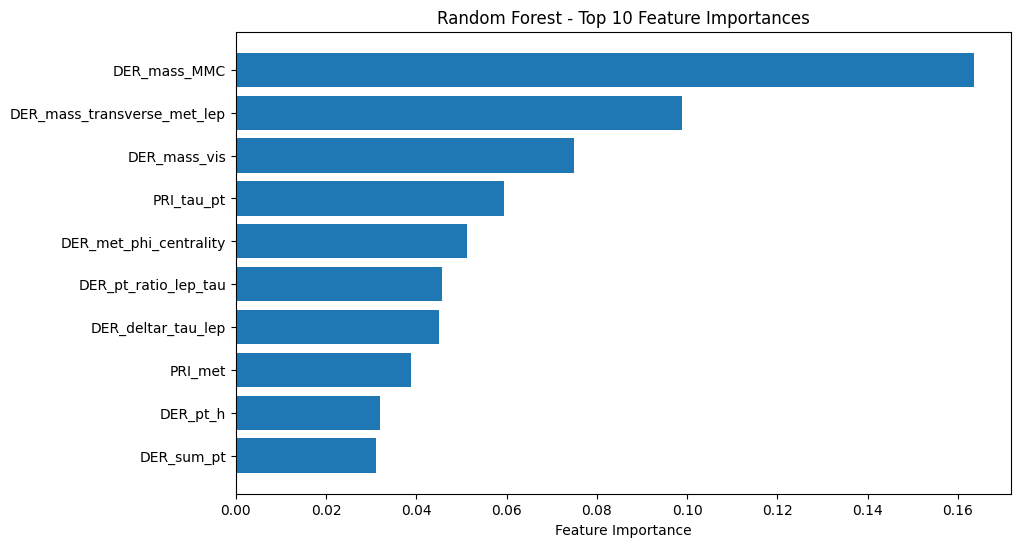

In [ ]:
#Random Forest Feature Importance Plot

feature_importance = randomForestModel.feature_importances_

sorted_idx = feature_importance.argsort()[::-1]

# Number of top features to display
top_n = 10

# Get the top 'n' feature names and importances
feature_names = ["DER_mass_MMC","DER_mass_transverse_met_lep","DER_mass_vis","DER_pt_h","DER_deltaeta_jet_jet","DER_mass_jet_jet","DER_prodeta_jet_jet","DER_deltar_tau_lep","DER_pt_tot","DER_sum_pt","DER_pt_ratio_lep_tau","DER_met_phi_centrality","DER_lep_eta_centrality","PRI_tau_pt","PRI_tau_eta","PRI_tau_phi","PRI_lep_pt","PRI_lep_eta","PRI_lep_phi","PRI_met","PRI_met_phi","PRI_met_sumet","PRI_jet_num","PRI_jet_leading_pt","PRI_jet_leading_eta","PRI_jet_leading_phi","PRI_jet_subleading_pt","PRI_jet_subleading_eta","PRI_jet_subleading_phi","PRI_jet_all_pt"]
top_features = [feature_names[i] for i in sorted_idx[:top_n]]
top_importances = feature_importance[sorted_idx][:top_n]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(range(top_n), top_importances, align="center")
plt.yticks(range(top_n), top_features)
plt.xlabel("Feature Importance")
plt.title("Random Forest - Top {} Feature Importances".format(top_n))
plt.gca().invert_yaxis()  # Invert the order to have the most important at the top
plt.show()

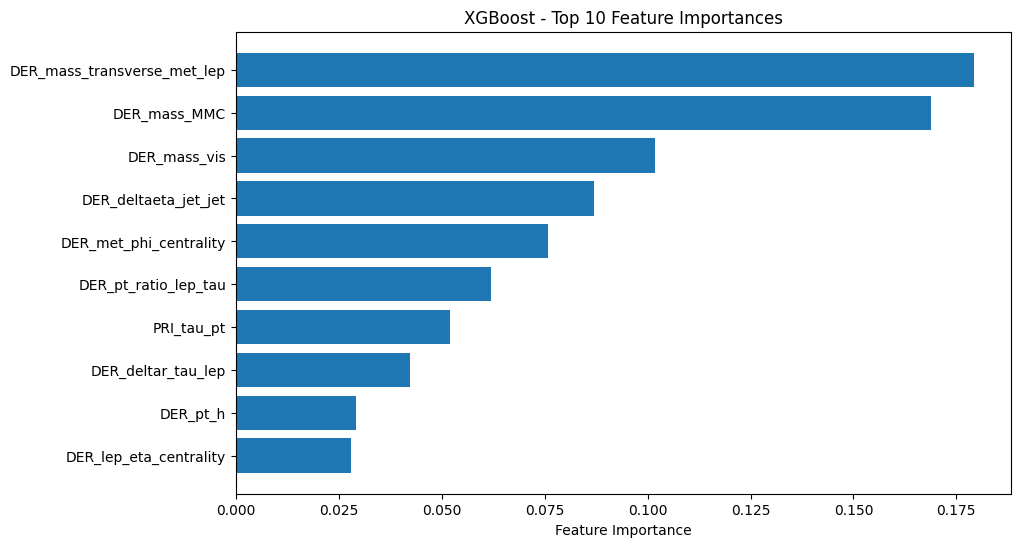

In [ ]:
#Random Forest Feature Importance Plot

feature_importance = xgb_model.feature_importances_

sorted_idx = feature_importance.argsort()[::-1]

# Number of top features to display
top_n = 10

# Get the top 'n' feature names and importances
feature_names = ["DER_mass_MMC","DER_mass_transverse_met_lep","DER_mass_vis","DER_pt_h","DER_deltaeta_jet_jet","DER_mass_jet_jet","DER_prodeta_jet_jet","DER_deltar_tau_lep","DER_pt_tot","DER_sum_pt","DER_pt_ratio_lep_tau","DER_met_phi_centrality","DER_lep_eta_centrality","PRI_tau_pt","PRI_tau_eta","PRI_tau_phi","PRI_lep_pt","PRI_lep_eta","PRI_lep_phi","PRI_met","PRI_met_phi","PRI_met_sumet","PRI_jet_num","PRI_jet_leading_pt","PRI_jet_leading_eta","PRI_jet_leading_phi","PRI_jet_subleading_pt","PRI_jet_subleading_eta","PRI_jet_subleading_phi","PRI_jet_all_pt"]
top_features = [feature_names[i] for i in sorted_idx[:top_n]]
top_importances = feature_importance[sorted_idx][:top_n]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(range(top_n), top_importances, align="center")
plt.yticks(range(top_n), top_features)
plt.xlabel("Feature Importance")
plt.title("XGBoost - Top {} Feature Importances".format(top_n))
plt.gca().invert_yaxis()  # Invert the order to have the most important at the top
plt.show()

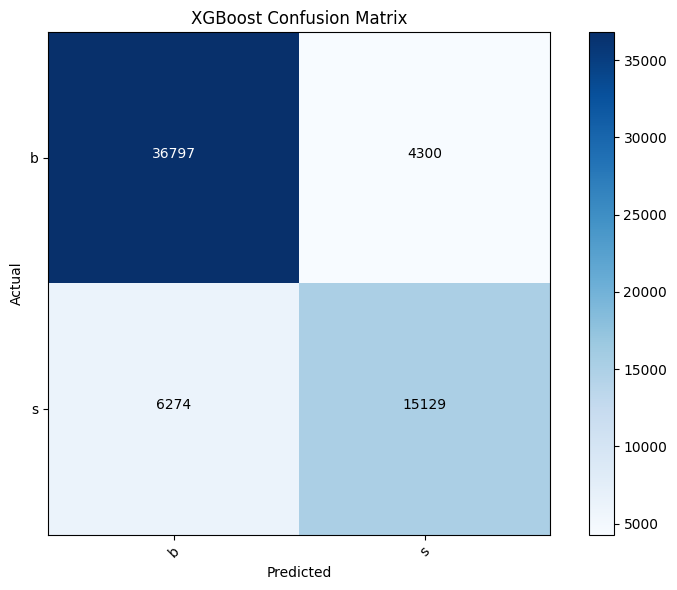

In [ ]:
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix_xgb, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('XGBoost Confusion Matrix')
plt.colorbar()

# Add labels to the axes (manually set class names)
classes = np.unique(y)  # Get unique class labels from your target column
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Add the actual numbers in each cell
for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, format(conf_matrix_xgb[i, j], 'd'), horizontalalignment="center", color="white" if conf_matrix_xgb[i, j] > conf_matrix_xgb.max() / 2 else "black")

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

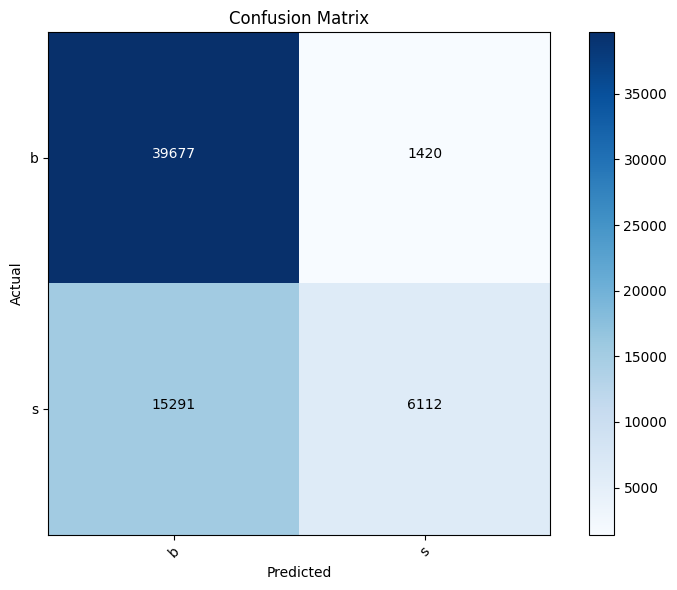

In [ ]:
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix_nn, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Add labels to the axes (manually set class names)
classes = np.unique(y)  # Get unique class labels from your target column
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Add the actual numbers in each cell
for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, format(conf_matrix_nn[i, j], 'd'), horizontalalignment="center", color="white" if conf_matrix_nn[i, j] > conf_matrix_nn.max() / 2 else "black")

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()